In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
def translate_coord_to_index(r, c):
    return (r+9,c+9)

print(translate_coord_to_index(10,10))

(19, 19)


In [4]:
def set_obstacles(obs_cells):
    for cell in obs_cells:
#         print(cell)
        grid[cell[0], cell[1]] = 1

In [44]:
n,m = 20,20
grid_cells = np.zeros((n,m))
# np.random.seed(0)  # You can remove the random seed if you want to test different random grids.
grid = grid_cells

cu0 = np.asarray([(8,7), (8,8), (9,6), (9,7), (9,8), (9,9), (10,5), (10,6),(10,7), (11,5), (11,6)])
cu1 = np.asarray([(4,0), (4,1), (4,2), (4,3), (4,4), (5,0),(5,1), (5,2), (5,3), (5,4)])
cu3 = np.asarray([(12,8), (12,9), (12,10), (12,11), (12,12), (12,13), (11,8), (11,9), (11,10), (11,11), (11,12), (11,13)])
cu4 = np.asarray([(3,14), (3,15), (3,16), (3,17), (3,18), (3,19), (2,14), (2,15), (2,16), (2,17), (2,18), (2,19)])
cu6 = np.asarray([(17,13), (17,14), (17,15), (16,13), (16,14), (16,15), (16,16), (16,17), (15,15), (15,16), (15,17)])

c5 = np.asarray([(6,6), (6,7), (5,6), (5,7)])
c6 = np.asarray([(9,4), (9,5), (8,4), (8,5)])
c7 = np.asarray([(15,6), (15,7), (14,6), (14,7)])
c8 = np.asarray([(3,10), (3,11), (2,10)])
c9 = np.asarray([(6,15), (6,16), (5,15)])
c10 = np.asarray([(8,11), (8,12), (7,11), (7,12)])
c11 = np.asarray([(11,15), (11,16), (10,15), (10,16)])
c12 = np.asarray([(18,1), (18,2), (17,1), (17,2)])


obstacles = np.concatenate((cu0, cu1, cu3, cu4, cu6, c5, c6, c7, c8, c9, c10, c11, c12))
set_obstacles(obstacles)

grid[1,2] = 2
grid[17,17] = 3


# grid

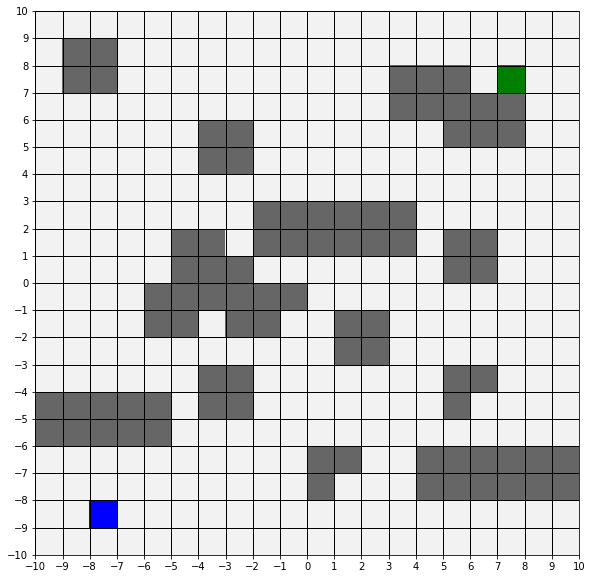

In [45]:
def draw_grid(fig_s=None, ax_s=None):
    fig, ax = (None, None)
    if fig_s == None or ax_s == None:
        fig, ax = plt.subplots(figsize=(10, 10))
    else:
        fig, ax = fig_s, ax_s
    cmap = colors.ListedColormap(['.95','.4', 'blue','green'])
    ax.imshow(grid, cmap=cmap, origin=['bottom left'], extent=[-10,10,-10,10])
    ax.grid(which='major', axis='both', linestyle='-', color='0', linewidth=1)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-10, 11, 1));
    ax.set_yticks(np.arange(-10, 11, 1));
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    return (fig, ax)

fig, ax = draw_grid()



In [46]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  314
Nodes: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 11), (2, 12), (2, 13), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 12), (3, 13), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 5), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 17), (6, 

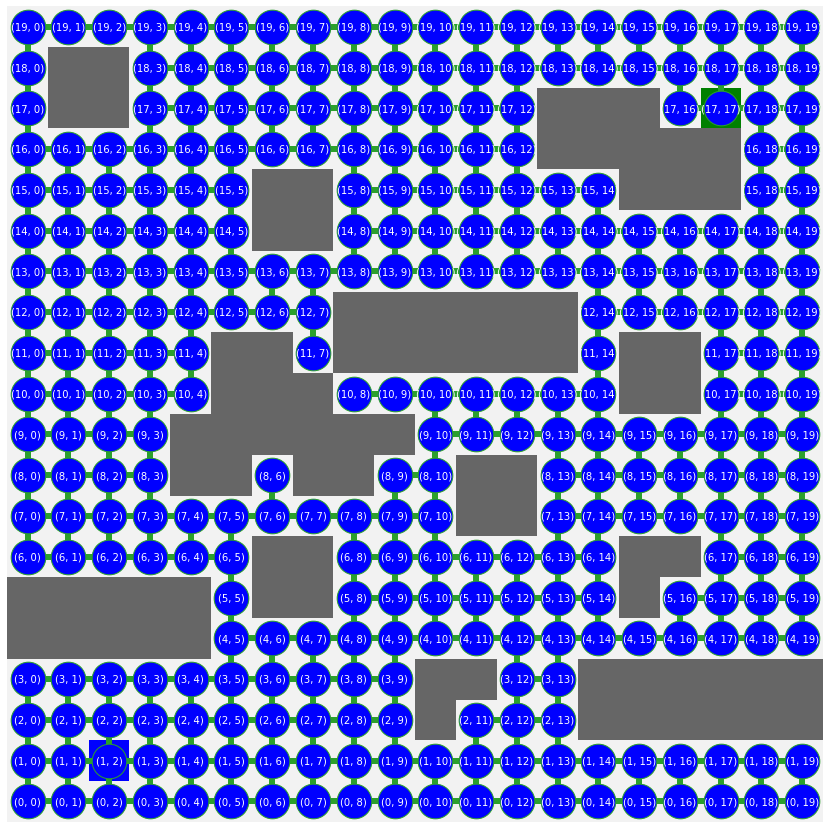

In [47]:
pos = {node:(node[1]-9.5, node[0]-9.5) for node in G.nodes()} 

# pos = nx.spring_layout(G, iterations=100, seed=39775)
fig, ax = plt.subplots(figsize=(15, 15))
fig, ax = draw_grid(fig, ax)
nx.draw(
    G,
    pos,
    node_color="b",
    edgecolors="tab:green",  # Node surface color
    edge_color="tab:green",  # Color of graph edges
    node_size=1200,
    with_labels=True,
    width=6,
    font_size=10,
    font_width=100,
    font_color="white"
    
)




In [49]:
start_node =  (1, 2)
end_node = (17,17)

# Run BFS to generate a tree
bfs_tree = nx.bfs_tree(G, source=start_node)


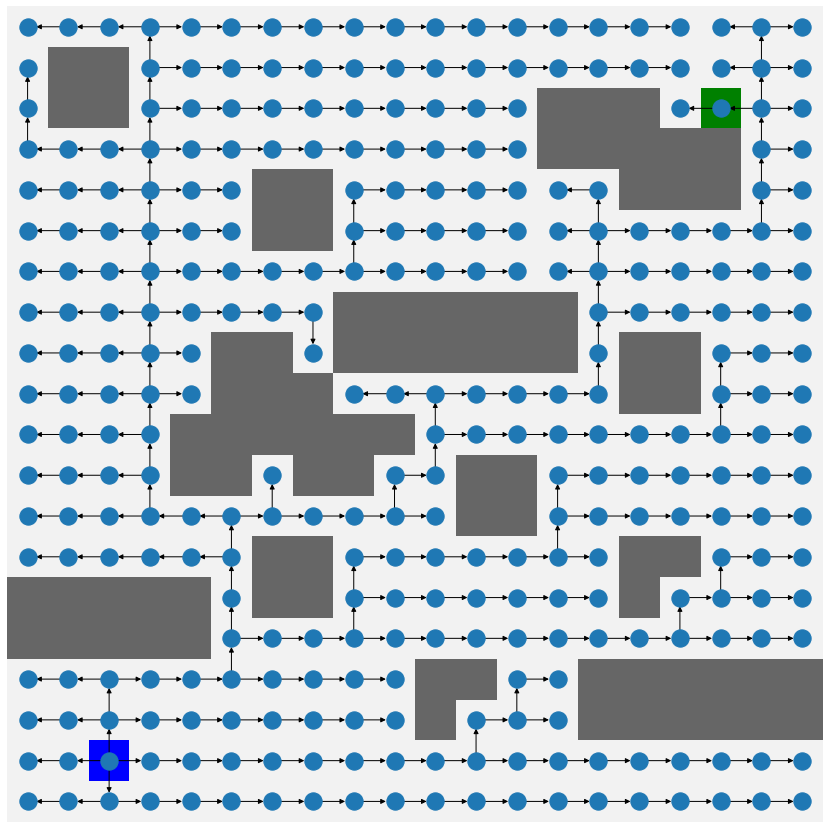

In [50]:
fig, ax = plt.subplots(figsize=(15, 15))
fig, ax = draw_grid(fig, ax)
nx.draw(bfs_tree, pos = pos)

In [51]:
path = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]

# Correct path
print(path)

[(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (11, 14), (12, 14), (13, 14), (14, 14), (14, 15), (14, 16), (14, 17), (14, 18), (15, 18), (16, 18), (17, 18), (17, 17)]


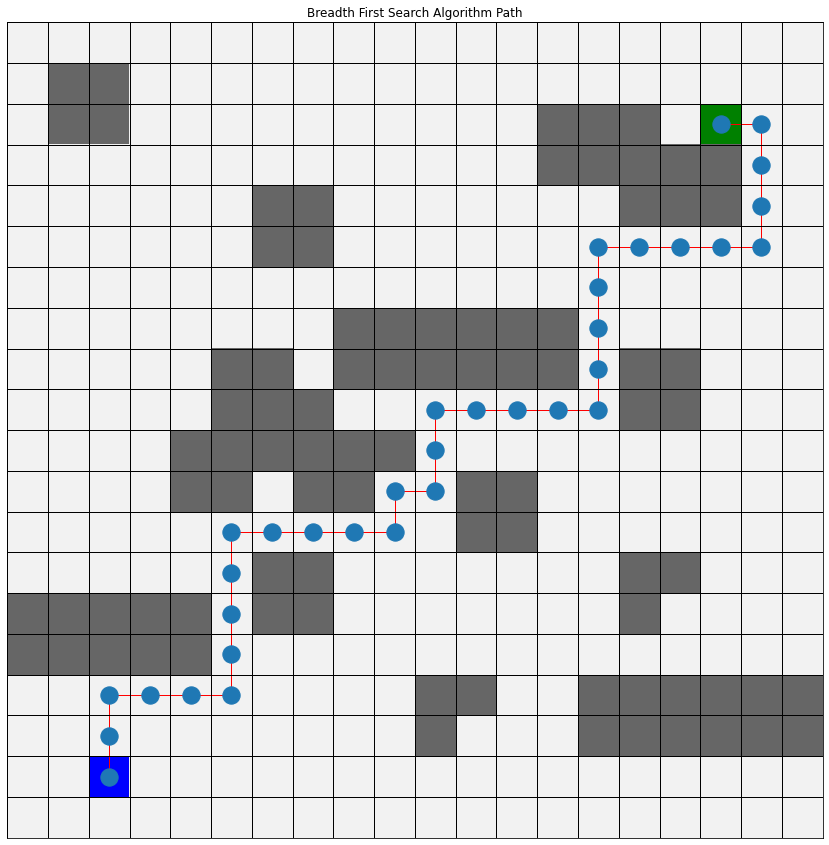

In [52]:
# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]

fig, ax = plt.subplots(figsize=(15, 15))
fig, ax = draw_grid(fig, ax)
ax.set_title("Breadth First Search Algorithm Path")
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, nodes=path, edgelist=E, pos=pos,edge_color='r')

In [13]:
 import sim

In [14]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(self.client_id, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

In [15]:
def generate_traj(path_):
    traj = []
    for r,c in path_:
#         print(r)
#         print(c)
        x = 10-c-.5
        y = 10-r-.5
        traj.append((x,y,.3525))
#         print(f'x,y: {x},{y}')
    return np.asarray(traj)
    
trajectory = generate_traj(path)    
print(trajectory)

[[ 7.5     8.5     0.3525]
 [ 7.5     7.5     0.3525]
 [ 7.5     6.5     0.3525]
 [ 6.5     6.5     0.3525]
 [ 5.5     6.5     0.3525]
 [ 4.5     6.5     0.3525]
 [ 4.5     5.5     0.3525]
 [ 4.5     4.5     0.3525]
 [ 4.5     3.5     0.3525]
 [ 4.5     2.5     0.3525]
 [ 3.5     2.5     0.3525]
 [ 2.5     2.5     0.3525]
 [ 1.5     2.5     0.3525]
 [ 0.5     2.5     0.3525]
 [ 0.5     1.5     0.3525]
 [-0.5     1.5     0.3525]
 [-0.5     0.5     0.3525]
 [-0.5    -0.5     0.3525]
 [-1.5    -0.5     0.3525]
 [-2.5    -0.5     0.3525]
 [-3.5    -0.5     0.3525]
 [-4.5    -0.5     0.3525]
 [-4.5    -1.5     0.3525]
 [-4.5    -2.5     0.3525]
 [-4.5    -3.5     0.3525]
 [-4.5    -4.5     0.3525]
 [-5.5    -4.5     0.3525]
 [-6.5    -4.5     0.3525]
 [-7.5    -4.5     0.3525]
 [-8.5    -4.5     0.3525]
 [-8.5    -5.5     0.3525]
 [-8.5    -6.5     0.3525]
 [-8.5    -7.5     0.3525]
 [-7.5    -7.5     0.3525]]


In [17]:
def follow_traj(traj):

    for pos in traj:
        dest = pos
        print(dest)
        disk.set_position(dest)
        robot_position = r.get_position()
        u = dest - robot_position
        print(u)
        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
        time.sleep(1.9)

    r.send_motor_velocities([0,0,0])

In [18]:
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)
disk = robot('Disc', client_id=r.client_id)
follow_traj(trajectory)

Robot connected
Robot connected
[7.5    8.5    0.3525]
[-0.12499523 -0.04063606 -0.00199931]
[7.5    7.5    0.3525]
[-0.02494144 -1.00785923 -0.00199892]
[7.5    6.5    0.3525]
[-0.0115366  -1.33302546 -0.00200092]
[6.5    6.5    0.3525]
[-1.01379395 -0.3553772  -0.00200095]
[5.5    6.5    0.3525]
[-1.22456503 -0.09767008 -0.00199773]
[4.5    6.5    0.3525]
[-1.27103519 -0.05617523 -0.00200101]
[4.5    5.5    0.3525]
[-0.25983095 -1.0690527  -0.00200068]
[4.5    4.5    0.3525]
[ 9.37938690e-04 -1.27037907e+00 -1.99939966e-03]
[4.5    3.5    0.3525]
[ 0.08420515 -1.3186636  -0.00200128]
[4.5    2.5    0.3525]
[ 0.10506296 -1.28162956 -0.00200086]
[3.5    2.5    0.3525]
[-0.90502262 -0.28668332 -0.00200128]
[2.5    2.5    0.3525]
[-1.1937747  -0.13182592 -0.00199842]
[1.5    2.5    0.3525]
[-1.22591424 -0.13446903 -0.00200161]
[0.5    2.5    0.3525]
[-1.29251385 -0.16010141 -0.00200125]
[0.5    1.5    0.3525]
[-0.29388666 -1.19756293 -0.00200113]
[-0.5     1.5     0.3525]
[-0.90812954 -0